In [1]:
import kagglehub
import os

# Download the latest version of the dataset
directory = kagglehub.dataset_download("adityamahimkar/iqothnccd-lung-cancer-dataset")

# Print the directory path
print("Path to dataset files:", directory)

# Explore the directory contents
print("Files and Folders in the Dataset:")
for root, dirs, files in os.walk(directory):
    print(f"Root: {root}")
    for dir_name in dirs:
        print(f" - Folder: {dir_name}")
    for file_name in files:
        print(f" - File: {file_name}")

# You can replace 'label=2' with the actual logic to load your dataset
def load_dataset(directory, label):
    print(f"Loading dataset with label: {label} from {directory}")

load_dataset(directory, label=2)


100%|██████████| 199M/199M [00:01<00:00, 181MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/adityamahimkar/iqothnccd-lung-cancer-dataset/versions/2
Files and Folders in the Dataset:
Root: /root/.cache/kagglehub/datasets/adityamahimkar/iqothnccd-lung-cancer-dataset/versions/2
 - Folder: Test cases
 - Folder: The IQ-OTHNCCD lung cancer dataset
Root: /root/.cache/kagglehub/datasets/adityamahimkar/iqothnccd-lung-cancer-dataset/versions/2/Test cases
 - File: 000133_03_02_192.png
 - File: 000284_02_02_018.png
 - File: 000284_03_01_084.png
 - File: 000054_03_01_025.png
 - File: 000138_01_01_114.png
 - File: 001598_15_02_231.png
 - File: 003601_02_01_076.png
 - File: 000749_03_02_108.png
 - File: 000103_01_01_104.png
 - File: 000226_02_01_079.png
 - File: 000238_09_03_124.png
 - File: 000103_08_01_021.png
 - File: 000143_05_01_120.png
 - File: 000021_02_01_068.png
 - File: 000247_05_01_178.png
 - File: 000238_09_03_162.png
 - File: 000207_04_01_068.png
 - File: 000020_03_01_212.png
 - File: 000021_04_01_090.png
 - File: 000230_01

In [2]:
#Importing the necessary libraries
import os
import cv2
import numpy as np

from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [3]:
def load_images_from_dir(directory, label):
    images = []
    labels = []
    for filename in os.listdir(directory):
        if filename.endswith(".jpg") or filename.endswith(".png"):
            img_path = os.path.join(directory, filename)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img is not None:
                img = cv2.resize(img, (128, 128))  # Resize images to a fixed size
                images.append(img)
                labels.append(label)
    return images, labels

In [4]:
benign_dir = "/root/.cache/kagglehub/datasets/adityamahimkar/iqothnccd-lung-cancer-dataset/versions/2/The IQ-OTHNCCD lung cancer dataset/The IQ-OTHNCCD lung cancer dataset/Bengin cases"
malignant_dir = f"/root/.cache/kagglehub/datasets/adityamahimkar/iqothnccd-lung-cancer-dataset/versions/2/The IQ-OTHNCCD lung cancer dataset/The IQ-OTHNCCD lung cancer dataset/Malignant cases"
normal_dir = f"/root/.cache/kagglehub/datasets/adityamahimkar/iqothnccd-lung-cancer-dataset/versions/2/The IQ-OTHNCCD lung cancer dataset/The IQ-OTHNCCD lung cancer dataset/Normal cases"

In [5]:
benign_images, benign_labels = load_images_from_dir(benign_dir, label=0)  # Assign label 0 for benign cases
malignant_images, malignant_labels = load_images_from_dir(malignant_dir, label=1)  # Assign label 1 for malignant cases
normal_images, normal_labels = load_images_from_dir(normal_dir, label=2)  # Assign label 2 for normal cases

In [6]:
images = benign_images + malignant_images + normal_images
labels = benign_labels + malignant_labels + normal_labels
images = np.array(images)
labels = np.array(labels)


In [7]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

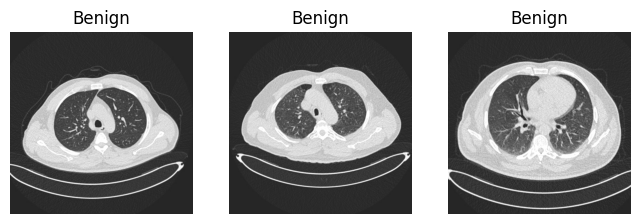

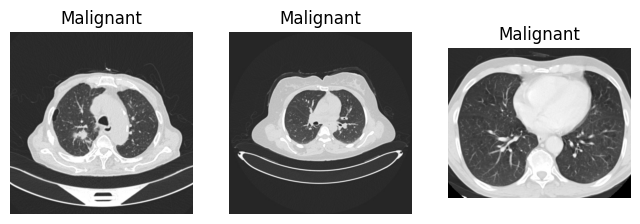

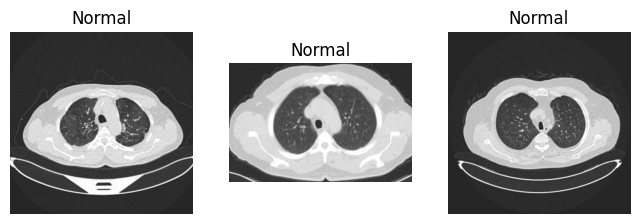

In [8]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt

# Define the categories and their corresponding image paths
categories = {
    "Benign": benign_dir,
    "Malignant": malignant_dir,
    "Normal": normal_dir
}

# Iterate over categories
for category, image_dir in categories.items():
    # Load images from the directory
    image_paths = [os.path.join(image_dir, filename) for filename in os.listdir(image_dir) if filename.endswith(('.jpg', '.png'))]
    # Create subplots for each category
    fig, ax = plt.subplots(1, 3, figsize=(8, 8))
    ax = ax.ravel()

    # Randomly sample 3 images from each category
    for i, img_path in enumerate(np.random.choice(image_paths, size=3, replace=False)):
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for correct display
        ax[i].imshow(img)
        ax[i].axis("off")
        ax[i].set_title(category)

    plt.show()

In [9]:
# Create a DataFrame with the counts of each category
count_data = pd.DataFrame({
    "label": ["Benign", "Malignant", "Normal"],
    "count": [len(benign_images), len(malignant_images), len(normal_images)]
})

# Create histogram using Plotly Express
fig = px.histogram(data_frame=count_data, x="label", y="count", color="label")

# Show the histogram
fig.show()

In [10]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')  # 3 output classes: benign, malignant, normal
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
y_train_encoded = to_categorical(y_train, num_classes=3)
y_test_encoded = to_categorical(y_test, num_classes=3)

print("Shape of X_train:", X_train.shape)
print("Shape of y_train_encoded:", y_train_encoded.shape)

history = model.fit(X_train, y_train_encoded, epochs=50, batch_size=32, validation_split=0.2)

print("Training history:", history.history)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Shape of X_train: (877, 128, 128)
Shape of y_train_encoded: (877, 3)
Epoch 1/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 16s 264ms/step - accuracy: 0.5438 - loss: 96.6396 - val_accuracy: 0.8409 - val_loss: 0.3983
Epoch 2/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - accuracy: 0.8379 - loss: 0.4405 - val_accuracy: 0.9205 - val_loss: 0.2110
Epoch 3/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9092 - loss: 0.2223 - val_accuracy: 0.9205 - val_loss: 0.2040
Epoch 4/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9627 - loss: 0.1177 - val_accuracy: 0.9716 - val_loss: 0.0887
Epoch 5/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9764 - loss: 0.0869 - val_accuracy: 0.9602 - val_loss: 0.1606
Epoch 6/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9776 - loss: 0.0784 - val_accuracy: 0.9545 - val_loss: 0.0929
Epoch 7/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9927 - loss: 0.0339 - val_accuracy: 0.9602 - val_loss: 0.1315
Epoch 8/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1

In [11]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

def history_plot(history):
    epochs = len(history.history['accuracy'])
    fig1 = make_subplots()
    fig1.add_trace(go.Scatter(x=np.arange(1, epochs + 1), y=history.history["accuracy"], name="Training Accuracy"))
    fig1.add_trace(go.Scatter(x=np.arange(1, epochs + 1), y=history.history["val_accuracy"], name="Validation Accuracy"))
    fig1.update_layout(title="Training and Validation Accuracy", xaxis_title="Epoch", yaxis_title="Accuracy")
    fig1.show()

    fig2 = make_subplots()
    fig2.add_trace(go.Scatter(x=np.arange(1, epochs + 1), y=history.history["loss"], name="Training Loss"))
    fig2.add_trace(go.Scatter(x=np.arange(1, epochs + 1), y=history.history["val_loss"], name="Validation Loss"))
    fig2.update_layout(title="Training and Validation Loss", xaxis_title="Epoch", yaxis_title="Loss")
    fig2.show()
history_plot(history)

In [12]:
y_test_encoded = to_categorical(y_test, num_classes=3)

test_loss, test_acc = model.evaluate(X_test, y_test_encoded)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_acc}')

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 168ms/step - accuracy: 0.9198 - loss: 0.6226
Test Loss: 0.4097976088523865
Test Accuracy: 0.9454545378684998


In [13]:

X = np.array(images)
y = np.array(labels)

X_flat = X.reshape(X.shape[0], -1)

X_train, X_test, y_train, y_test = train_test_split(X_flat, y, test_size=0.2, random_state=42)

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print("Test Accuracy:", accuracy)

Test Accuracy: 0.9227272727272727


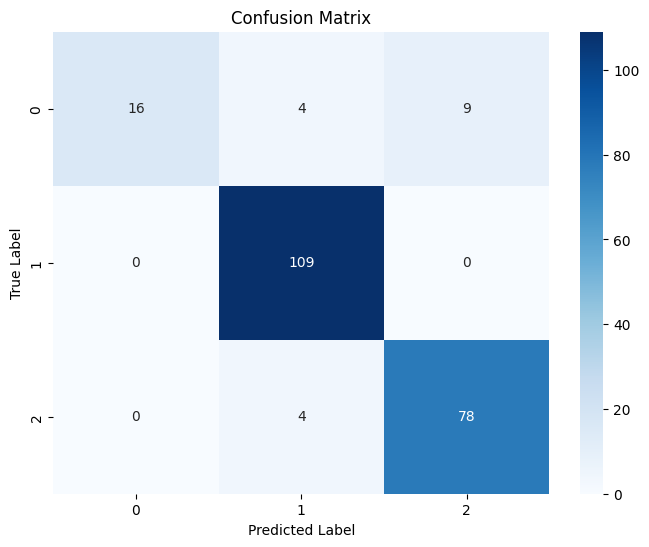

In [14]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(y_test)  # Assuming y_test is your true labels

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [15]:
X, y = make_classification(n_samples=1200, n_features=20, n_classes=3, n_clusters_per_class=1, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

np.random.seed(42)
noise_indices = np.random.choice(len(y_train), size=int(0.2 * len(y_train)), replace=False)
y_train[noise_indices] = np.random.randint(0, 3, size=len(noise_indices))  # Randomly assign new labels

svm_classifier = SVC(kernel='linear')

svm_classifier.fit(X_train, y_train)

y_pred = svm_classifier.predict(X_test)

test_accuracy = accuracy_score(y_test, y_pred)

print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.925


Test Accuracy: 0.9125


/tmp/ipython-input-2172954238.py:35: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



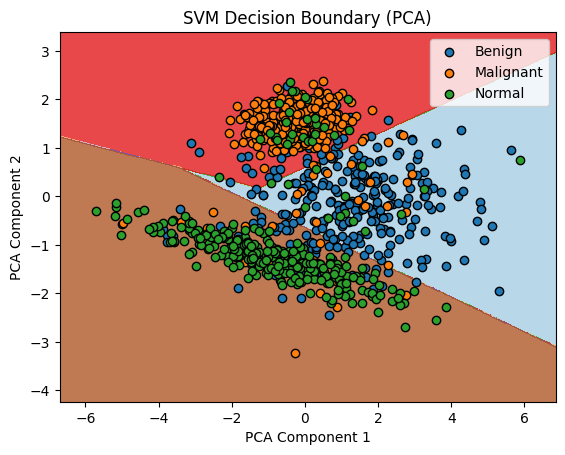

In [16]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reduce feature space to two dimensions using PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Train SVM classifier on reduced feature space
svm_classifier.fit(X_train_pca, y_train)

# Make predictions on test data
y_pred = svm_classifier.predict(X_test_pca)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", test_accuracy)


class_labels = ['Benign', 'Malignant', 'Normal']

# Plot decision boundary
h = .02  # step size in the mesh
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = svm_classifier.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

# Plot the training points with labels
for i in range(len(class_labels)):
    plt.scatter(X_train_pca[y_train == i, 0], X_train_pca[y_train == i, 1],
                edgecolors='k', cmap=plt.cm.Paired, label=class_labels[i])
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('SVM Decision Boundary (PCA)')
plt.legend()
plt.show()

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Generate synthetic data
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Introduce noise to the training data
np.random.seed(42)
noise_indices = np.random.choice(len(y_train), size=int(0.2 * len(y_train)), replace=False)
y_train[noise_indices] = 1 - y_train[noise_indices]  # Flip the labels for selected indices
# Initialize Logistic Regression classifier
logistic_regression = LogisticRegression(max_iter=1000, C=1.0)  # Adjust regularization strength if needed

# Train the Logistic Regression classifier
logistic_regression.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = logistic_regression.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)

print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.865


In [18]:
# prompt: now i want to check the model by the image prediction

from PIL import Image

def predict_image(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is not None:
        img = cv2.resize(img, (128, 128))
        img = np.array(img).reshape(1,128,128,1)
        prediction = model.predict(img)
        predicted_class = np.argmax(prediction)
        class_labels = ["Benign", "Malignant", "Normal"]
        predicted_label = class_labels[predicted_class]
        return predicted_label
    else:
        return "Error: Could not load image."

# Example usage
image_path = "new1.png"  # Replace with your image path
prediction = predict_image(image_path)
print(f"The predicted class for the image is: {prediction}")

The predicted class for the image is: Error: Could not load image.


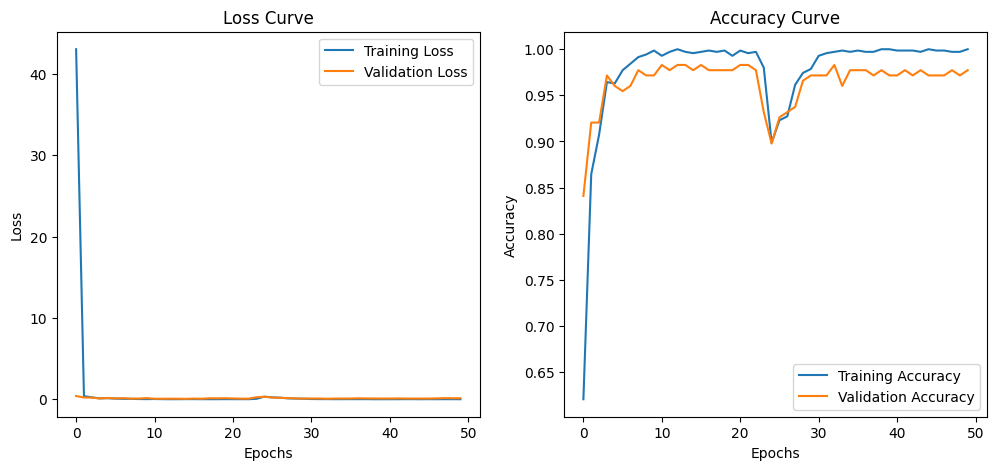

In [19]:
import matplotlib.pyplot as plt

# Assuming `history` is the output of model.fit().
plt.figure(figsize=(12, 5))

# Loss Curve
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend()

# Accuracy Curve
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Curve')
plt.legend()

plt.show()


Accuracy: 0.86
Precision: 0.89
Recall: 0.85
F1 Score: 0.87


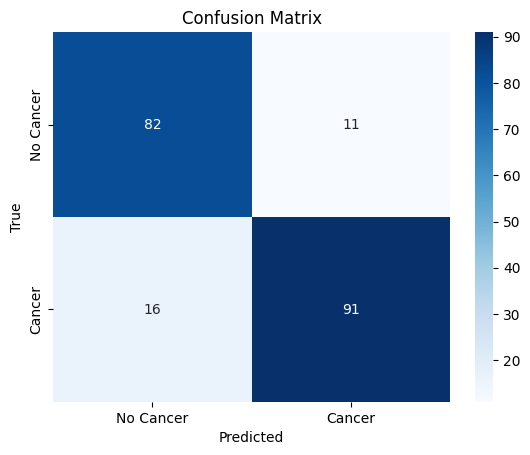

In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_test and y_pred are your true labels and predicted labels.
# Predicted probabilities for ROC curve: y_proba.

# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')  # 'binary' for two classes; use 'weighted' for multiclass.
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Cancer', 'Cancer'], yticklabels=['No Cancer', 'Cancer'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [21]:
# prompt: i want to save the modal as keras

model.save('Lung Cancer.keras')

In [23]:
# prompt: now check  model by taking one input and predict it output

def predict_image(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is not None:
        img = cv2.resize(img, (128, 128))
        img = np.array(img).reshape(1,128,128,1)
        prediction = model.predict(img)
        predicted_class = np.argmax(prediction)
        class_labels = ["Benign", "Malignant", "Normal"]
        predicted_label = class_labels[predicted_class]
        return predicted_label
    else:
        return "Error: Could not load image."

# Example usage
image_path = "lung_cancer.jpg" # Replace with the actual path to your image
prediction = predict_image(image_path)
print(f"The predicted class for the image is: {prediction}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
The predicted class for the image is: Malignant
